# Zero-velocity curves for different Jacoby integrals

Figure 2.2 from Chapter 2 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Zero-velocity curves for different values of the Jacobi integral C<sub>J</sub>, in a restricted three-body
system with f=0.03. Units are chosen such that $\mu$=1, $a$=1, and thus $\Omega$=1. The barycenter is at
(0,0), the primary is at (−0.03,0), and the secondary is at (0.97,0).

In [43]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# Use Newton-Raphson root solving for this plot

from scipy.optimize import newton

# suppress nuisance warnings

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [44]:
plotFile = 'Fig2_2.png'

# graphic aspect ratio = width/height

aspect = 1.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Effective Potential 

In the restricted 3-body problem, the <b>Effective Gravitational Potential</b> $\Phi_{\rm eff}$ in
the co-rotating (X,Y) coordinates is (*CSD* Chapter 2, Eqn 2.9):
\begin{equation}
   \Phi_{\rm eff}(X,Y) = -\frac{\Omega^2}{2}(X^2+Y^2) - \frac{(1-f)\mu}{R_1} - \frac{f\mu}{R_2}
\end{equation}
where:
 * $a$ = separation between the primary and secondary
 * $\mu = G(m_1+m_2)$
 * $f=m_2/(m_1+m_2)$ is the fraction of the total mass in the secondary
 * $R_1^2 = (X+fa)^2 + Y^2$ is the distance of the test mass from the primary
 * $R_2^2 = (X - [1-f]a)^2 + Y^2$ is the distance of the test mass from the secondary

Re-write this in dimensionless form in $\mu$=1, $a$=1 (so $\Omega$=1) units:

\begin{equation}
  \Phi_{\rm eff} = -\frac{1}{2}(\xi^2+\eta^2) - \frac{(1-f)}{r_1} - \frac{f}{r_2}
\end{equation}
where:
 * $\xi = X/a$ and $\eta = Y/a$ are the dimenionless cartesian coordinates
 * $f = M_2/(M_1+M_2)$ = fraction of the total mass in the secondary
 * $r_1^2 = (\xi+f)^2 + \eta^2$ = dimensionless distance of the test mass from the primary
 * $r_2^2 = (\xi-[1-f])^2 + \eta^2$ = dimensionless distance of the test mass from the secondary
 

In [45]:
def effPhi(xi,eta,f):
    r1 = np.sqrt((xi+f)**2 + eta**2)
    r2 = np.sqrt((xi-(1-f))**2 + eta**2)
    result = -0.5*(xi*xi + eta*eta) - (1-f)/r1 - f/r2
    return result

### Calculate the colinear Lagrange points numerically

This is a function $f(\xi,f)$, where $\xi$ is the dimensionless X coordinate and $f$ is the fraction of the total mass in the secondary ($f=m_2/m_1+m+2$). The function will be passed to a Newton-Raphson root solver (`scipy.optimize.newton`) to find a value for $\xi$ that satsifies the equation for a given value of $f$.

The solver will try different values of $\xi$ until the return value is equal to zero.

This is how we solve for the colinear Lagrange points numerically, rather than estimating them with 
analytic approximation formulae (see *CSD* Eqn 2.21 recast in dimensionless form).

In [46]:
def colinearLagrange(xi, f):  
    first_term = xi
    second_term = (1-f) / np.abs(xi - f)**3 * (xi - f)
    third_term = f / np.abs(xi + 1 - f)**3 * (xi + 1 - f)
    return first_term - second_term - third_term

## Make the plot

Plot the zero-velocity curves for values of the Jacobi integral of C<sub>J</sub>=3.0, 3.15, 3.3, and 3.45,
filling in the forbidden regions in gray.

With matplotlib version > 3.8, the behavior of the collections and paths for contours changed, so we need
to be a little hacky below.  

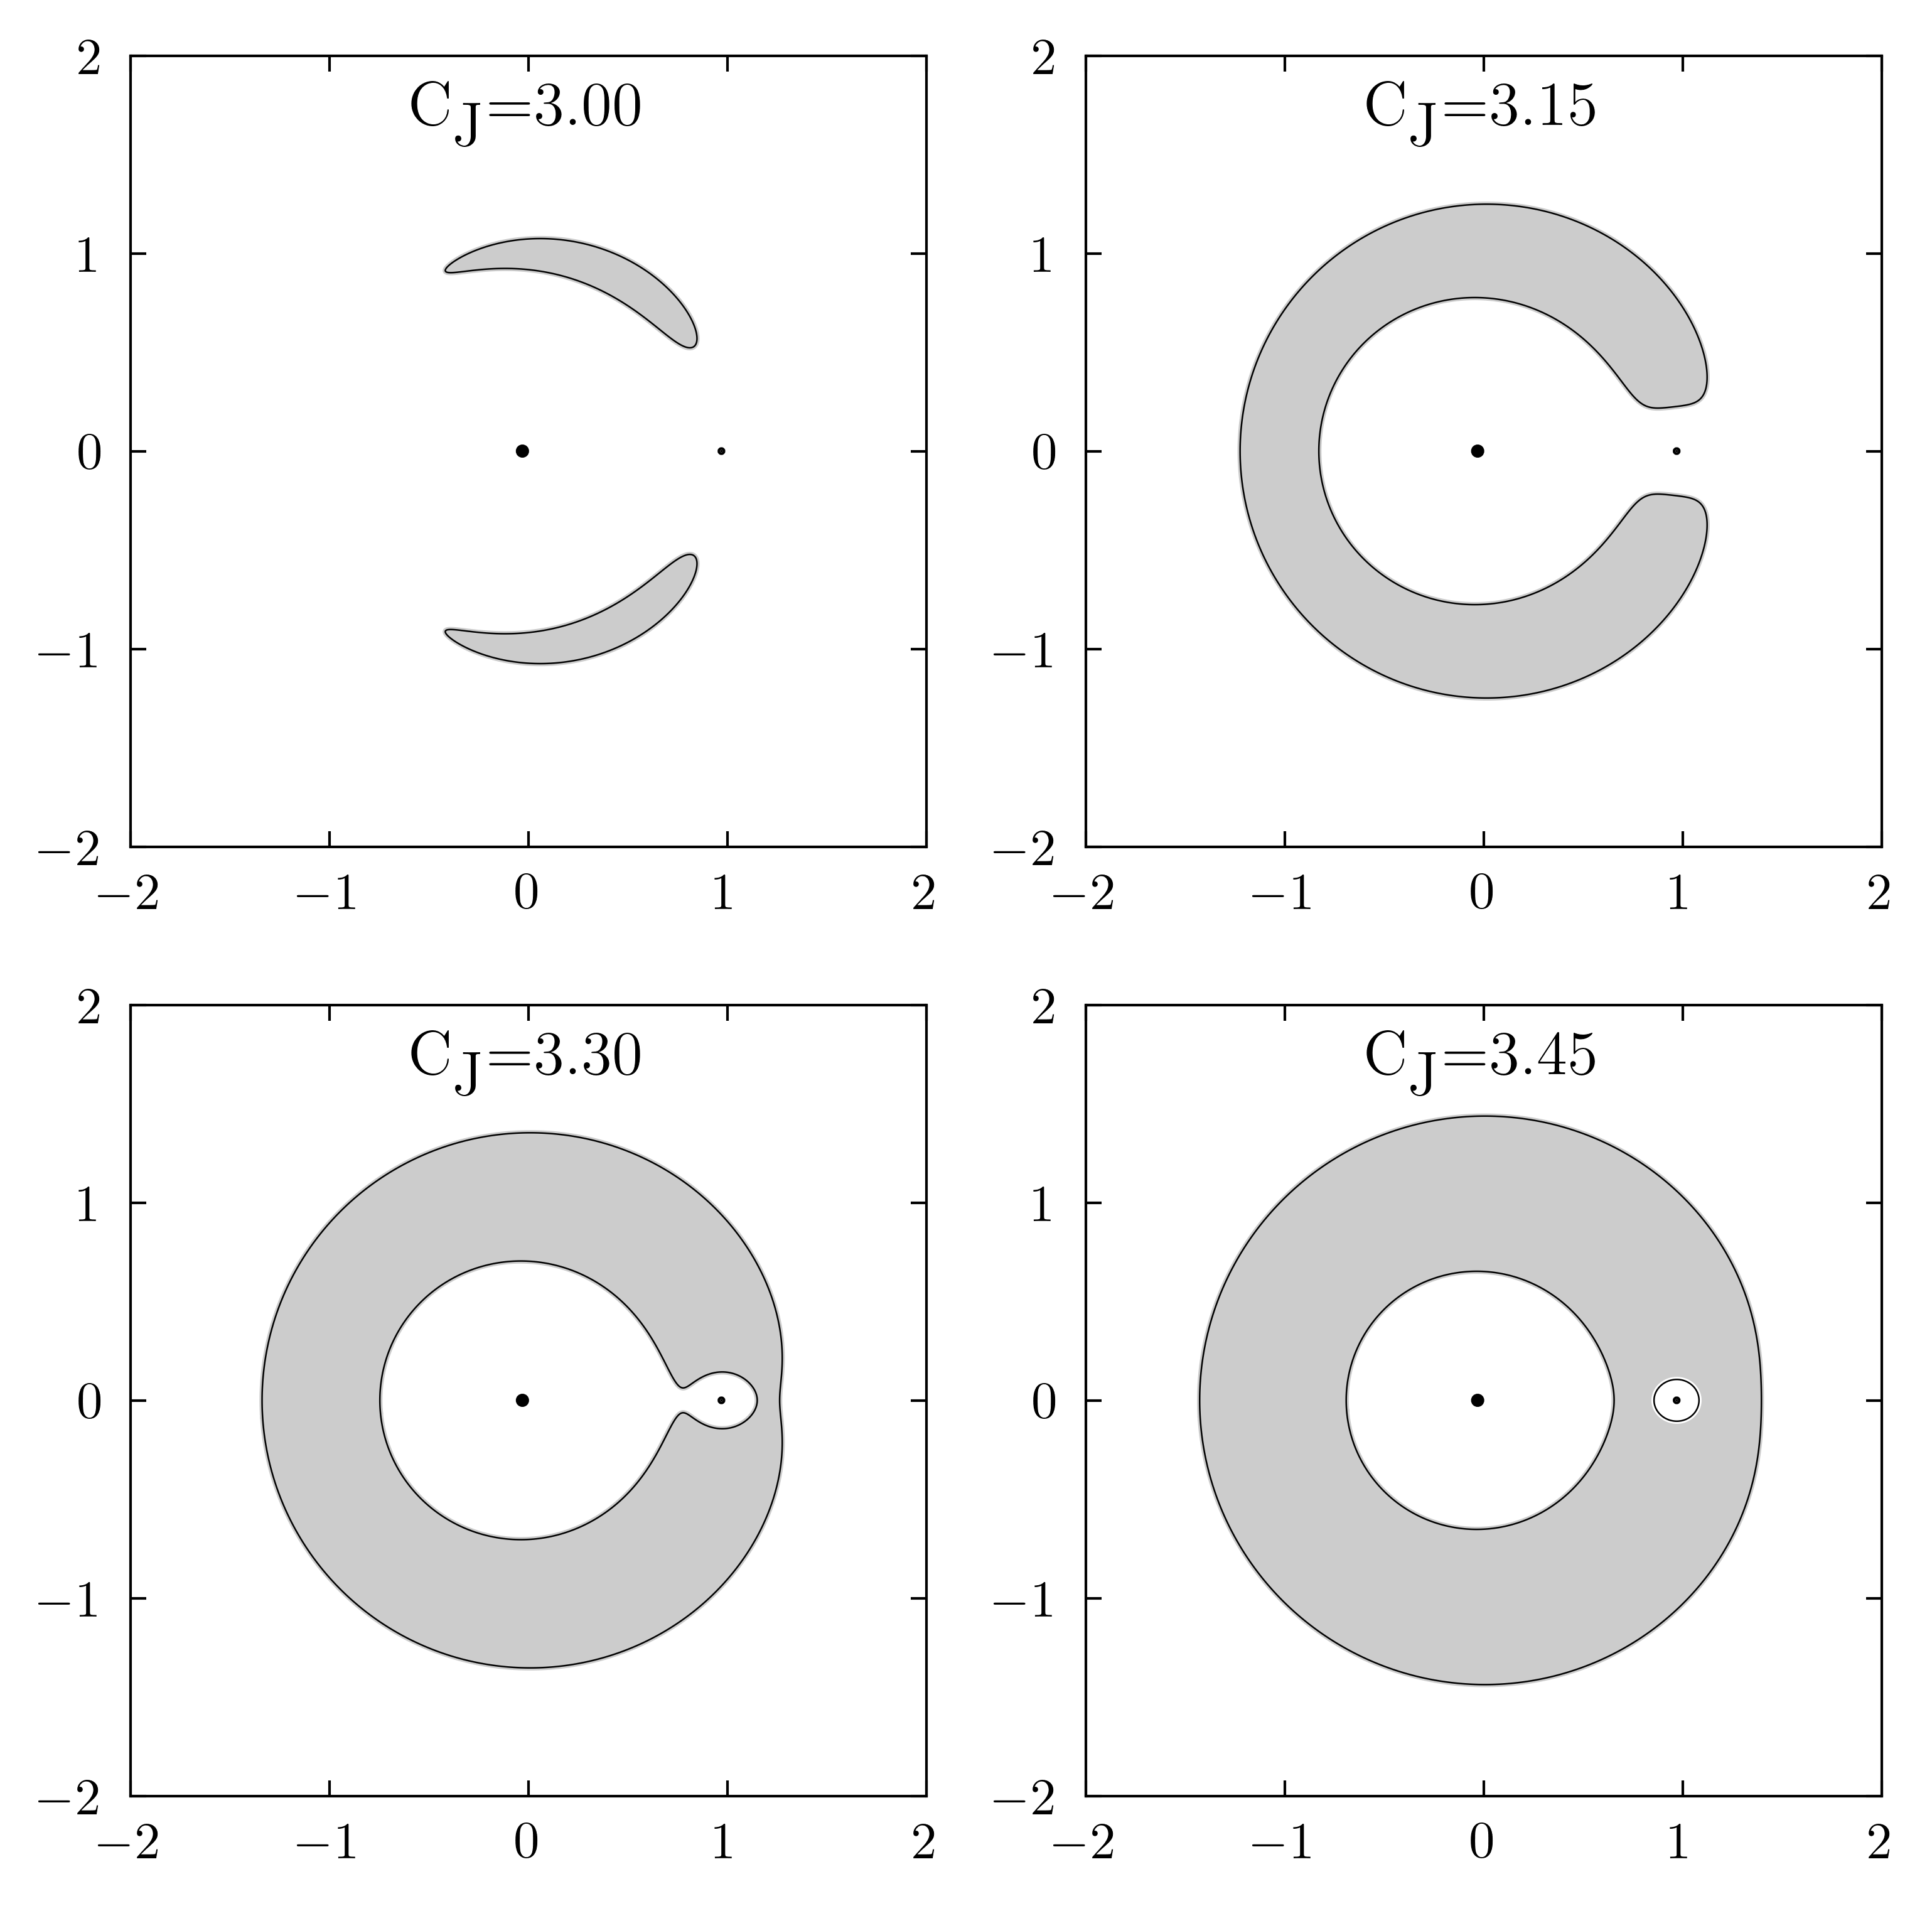

In [47]:
# font size for labeling plots with C_J values

cjFont = 12

# fraction of total mass in the secondary

f = 0.03

# Values of C_J to plot, in order: upper left, upper right, lower left, lower right

listCJ = [3.0,3.15,3.3,3.45]

# Some plotting choices here

# plot XY axis tick marks?

plotTicks = True

# Plot lagrange points as + points (True) or labels (False)

labelLagrange = False
plotPoints = False

# body radii proportional to cube root of the mass ratio (same bulk density), for show purposes

R1 = 0.02
R2 = R1*np.cbrt(f/(1-f)) # = R1*np.cbrt(M2/M1) in mass-ratio form

# setup the grid in xi, eta coords in the rotating frame

xg = np.linspace(-2,2,1001)

eta, xi = np.meshgrid(xg,xg)

# Numerical estimation of the colinear lagrange points (L1,L2,L3) using Newton's method to find roots

L1 = [newton(func=colinearLagrange,x0=0 ,args=(1-f,)),0]
L2 = [newton(func=colinearLagrange,x0=1 ,args=(1-f,)),0]
L3 = [newton(func=colinearLagrange,x0=-1,args=(1-f,)),0]

# Analytic computation of L4 and L5

L4 = [0.5 - f, 0.5*np.sqrt(3)]
L5 = [0.5 - f,-0.5*np.sqrt(3)]

# xi,eta coordinates of the lagrange points

L_points = np.array([L1,L2,L3,L4,L5])

# offset for labels

L_offset = np.array([[0.0,-0.2],[0.0,-0.2],[0.0,-0.2],[0.0,0.3],[0.0,-0.3]])

# xi locations of the primary and secondary (eta1=eta2=0)

xi1 = -f
xi2 = 1-f

# compute the effective potential

ePhi = effPhi(xi,eta,f)

# setup the 4 panel 2x2 plot:

fig,ax = plt.subplots(2,2,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0.2, hspace=0.2)

# setup common elements of each panel and their decor

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',
                            labelsize=10,right='on')
        ax[i,j].tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')
        #ax[i,j].axis('equal')
        ax[i,j].set_xlim(-2.0, 2.0)
        ax[i,j].set_xticks([-2,-1,0,1,2])
        #ax[i,j].xaxis.set_minor_locator(MultipleLocator(0.2))
        ax[i,j].set_ylim(-2.0, 2.0)
        ax[i,j].set_yticks([-2,-1,0,1,2])
        #ax[i,j].yaxis.set_minor_locator(MultipleLocator(0.2))

        if labelLagrange:
            for k in range(5):
                if plotPoints:
                    ax[i,j].plot(L_points[k][0],L_points[k][1], '+', color='black', mew=0.5, ms=4, zorder=4)
                    ax[i,j].text(L_points[k][0]+L_offset[k][0],L_points[k][1]+L_offset[k][1],fr'L$_{k+1}$',
                                color='black',va='center',ha='center',fontsize=labelFontSize)
                else:
                    ax[i,j].text(L_points[k][0],L_points[k][1],fr'L$_{k+1}$',color='black',
                                 va='center',ha='center',fontsize=labelFontSize)

        # put in the primary and secondary, scale

        primary = ax[i,j].add_patch(plt.Circle((xi1,0),R1,color='black',zorder=4))
        secondary = ax[i,j].add_patch(plt.Circle((xi2,0),R2,color='black',zorder=4))
        
        # index of C_J value within the grid
                                      
        iCJ = int(j + 2*i)
    
        zvPhi = -0.5*listCJ[iCJ]

        cs = ax[i,j].contour(xi,eta,ePhi,levels=[zvPhi],colors=['black'],linestyles='solid',linewidths=0.3)
        p = cs.get_paths()
        
        # new path logic after matplotlib 3.8 - this is a hack, not generic.  Maybe in a later version...
        
        for k in range(len(p)):
            v = p[k].vertices
            c = p[k].codes
            numPaths = len(np.where(p[k].codes==1)[0]) # code 1 = MoveTo
            xrc = v[:,0]
            yrc = v[:,1]           
            if iCJ == 0 and numPaths == 2:
                brkPt = np.where(p[k].codes==1)[0][1]
                ax[i,j].fill(xrc[:brkPt],yrc[:brkPt],color='#cccccc')
                ax[i,j].fill(xrc[brkPt:],yrc[brkPt:],color='#cccccc')
            elif iCJ == 3 and numPaths == 3:
                brkPt = np.where(p[k].codes==1)[0][2]
                ax[i,j].fill(xrc[:brkPt],yrc[:brkPt],color='#cccccc')
                ax[i,j].fill(xrc[brkPt:],yrc[brkPt:],color='white')        
            else:
                ax[i,j].fill(xrc,yrc,color='#cccccc')
                            
        ax[i,j].text(0.0,1.7,rf'C$_{{\textrm J}}$={listCJ[iCJ]:.2f}',fontsize=cjFont,va='center',ha='center')

# plot it

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')